In [1]:
# Import necessary modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker


folder_data = "/Odyssey/private/t22picar/data/glorys_2020_0m/"
file_glorys = "cmems_mod_glo_phy_my_0.083deg_P1D-m_multi-vars_180.00W-179.92E_80.00S-90.00N_0.49m_2020-01-20-2021-04-20.nc"

maps = xr.open_dataset(folder_data+file_glorys)
maps

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 2041, longitude: 4320, time: 457)
Coordinates:
  * depth      (depth) float32 0.494
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * time       (time) datetime64[ns] 2020-01-20 2020-01-21 ... 2021-04-20
Data variables:
    mlotst     (time, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes:
    institution:               MERCATOR OCEAN
    title:                     daily mean fields from Global Ocean Physics An...
    history:                   2023/06/01 16:20:05 MERCATOR OCEAN Netcdf crea...
    comment:                   CMEMS product
    Conventions:               CF-1.4
    references:                http://www.mercator-ocean.fr
    source:                    MERCATOR GLORYS12V1
    copernicusmarine_version:  2.0.1

In [14]:
lat = maps.latitude.values
lon = maps.longitude.values
sst = maps.thetao.values[0:1,0,:]


#### SST GLORYS

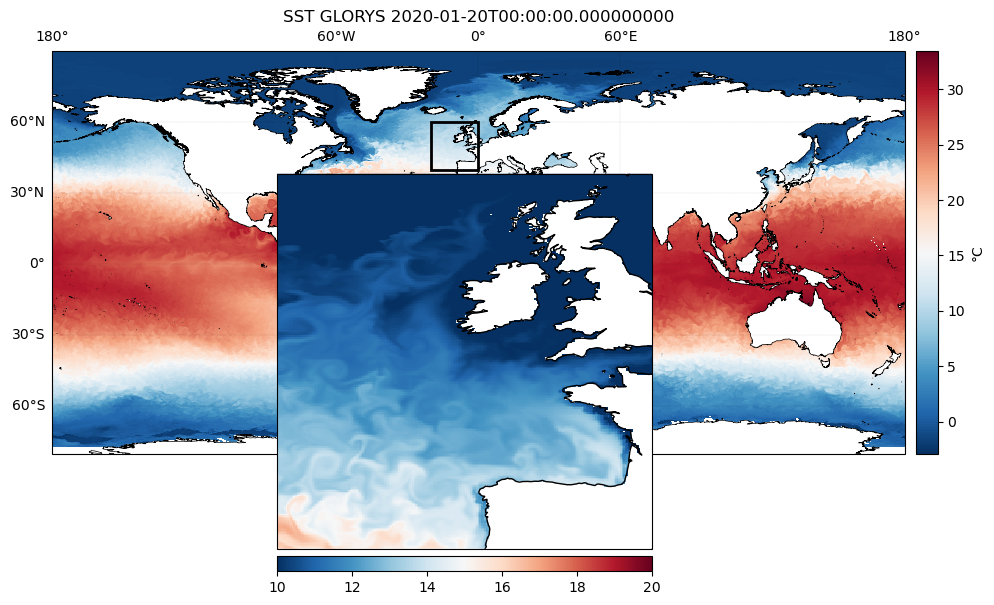

In [3]:
fig, axs = plt.subplots(nrows=1,ncols=1,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11*1,7.5*1))
#p0 = plt.pcolormesh(lon2D, lat2D, norm_uv, cmap='jet',vmax=1)
p0 = plt.pcolormesh(lon, lat, sst, cmap='RdBu_r')
plt.title("SST GLORYS "+str(maps.time.values[0]))

axs.coastlines(resolution='10m', lw=0.5)
#axs.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#EEEEEE', edgecolor='face',alpha=1)

# optional add grid lines
p0.axes.gridlines(color='black', alpha=0., linestyle='--')

# draw parallels/meridiens and write labels
gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        linewidth=0.1, color='black', alpha=0.5, linestyle='--')
# adjust labels to taste
gl.top_labels = True
gl.right_labels = False
gl.bottom_labels = False
gl.left_labels = True
#gl.xlabels_bottom = False
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xlocator = mticker.FixedLocator([-180, -60, 0,  60, 180])
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

#get size and extent of axes:
axpos = axs.get_position()
pos_x = axpos.x0+axpos.width + 0.01# + 0.25*axpos.width
pos_y = axpos.y0
cax_width = 0.02
cax_height = axpos.height
#create new axes where the colorbar should go.
#it should be next to the original axes and have the same height!
pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])
cbar=plt.colorbar(p0, cax=pos_cax)
cbar.set_label('°C')

zoom_extent = [-20, 0, 40, 60]  # Exemple de zoom sur l'Europe

# Ajouter un zoom sur une région spécifique
ax_zoom = fig.add_axes([0.25, 0.10, 0.5, 0.5], projection=ccrs.PlateCarree())
ax_zoom.set_extent(zoom_extent, crs=ccrs.PlateCarree())  # Exemple de zoom sur l'Europe
ax_zoom.coastlines()
contour_zoom = ax_zoom.pcolormesh(lon, lat, sst, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmax=20,vmin=10)

#cax = fig.add_axes([ax_zoom.get_position().x1+0.01,ax_zoom.get_position().y0,0.02,ax_zoom.get_position().height])
cax = fig.add_axes([ax_zoom.get_position().x0,ax_zoom.get_position().y0-0.03,ax_zoom.get_position().width,0.02])
cbar = plt.colorbar(contour_zoom,cax=cax,orientation="horizontal")


# Ajouter les contours de la zone zoomée sur la carte principale
zoom_rect = plt.Rectangle((zoom_extent[0], zoom_extent[2]),
                          zoom_extent[1] - zoom_extent[0],
                          zoom_extent[3] - zoom_extent[2],
                          linewidth=2, edgecolor='k', facecolor='none',
                          transform=ccrs.PlateCarree())
axs.add_patch(zoom_rect)



#### SST L4 micro-onde

In [4]:
folder_data = "/Odyssey/private/t22picar/data/sst_L4/"

file_sst_obs = "20210630120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc"

maps_sat = xr.open_dataset(folder_data+file_sst_obs)
lat_sat = maps_sat.lat.values
lon_sat = maps_sat.lon.values
sst_sat = maps_sat.analysed_sst.values[0,:]-273.15


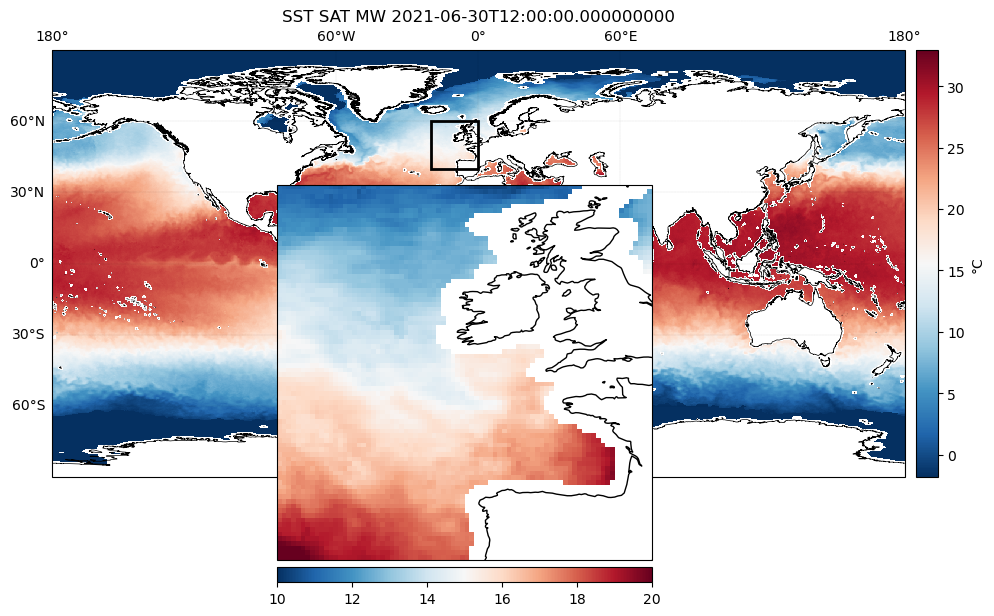

In [5]:
fig, axs = plt.subplots(nrows=1,ncols=1,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11*1,7.5*1))

plt.title("SST SAT MW "+str(maps_sat.time.values[0]))
#p0 = plt.pcolormesh(lon2D, lat2D, norm_uv, cmap='jet',vmax=1)
p0 = plt.pcolormesh(lon_sat, lat_sat, sst_sat, cmap='RdBu_r')


axs.coastlines(resolution='10m', lw=0.5)
#axs.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#EEEEEE', edgecolor='face',alpha=1)

# optional add grid lines
p0.axes.gridlines(color='black', alpha=0., linestyle='--')

# draw parallels/meridiens and write labels
gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        linewidth=0.1, color='black', alpha=0.5, linestyle='--')
# adjust labels to taste
gl.top_labels = True
gl.right_labels = False
gl.bottom_labels = False
gl.left_labels = True
#gl.xlabels_bottom = False
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xlocator = mticker.FixedLocator([-180, -60, 0,  60, 180])
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

#get size and extent of axes:
axpos = axs.get_position()
pos_x = axpos.x0+axpos.width + 0.01# + 0.25*axpos.width
pos_y = axpos.y0
cax_width = 0.02
cax_height = axpos.height
#create new axes where the colorbar should go.
#it should be next to the original axes and have the same height!
pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])
cbar=plt.colorbar(p0, cax=pos_cax)
cbar.set_label('°C')

zoom_extent = [-20, 0, 40, 60]  # Exemple de zoom sur l'Europe

# Ajouter un zoom sur une région spécifique
ax_zoom = fig.add_axes([0.25, 0.10, 0.5, 0.5], projection=ccrs.PlateCarree())
ax_zoom.set_extent(zoom_extent, crs=ccrs.PlateCarree())  # Exemple de zoom sur l'Europe
ax_zoom.coastlines()
contour_zoom = ax_zoom.pcolormesh(lon_sat, lat_sat, sst_sat, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmax=20,vmin=10)

#cax = fig.add_axes([ax_zoom.get_position().x1+0.01,ax_zoom.get_position().y0,0.02,ax_zoom.get_position().height])
cax = fig.add_axes([ax_zoom.get_position().x0,ax_zoom.get_position().y0-0.03,ax_zoom.get_position().width,0.02])
cbar = plt.colorbar(contour_zoom,cax=cax,orientation="horizontal")

# Ajouter les contours de la zone zoomée sur la carte principale
zoom_rect = plt.Rectangle((zoom_extent[0], zoom_extent[2]),
                          zoom_extent[1] - zoom_extent[0],
                          zoom_extent[3] - zoom_extent[2],
                          linewidth=2, edgecolor='k', facecolor='none',
                          transform=ccrs.PlateCarree())
axs.add_patch(zoom_rect)



#### Filtre SST glorys

In [15]:
sst.shape

(1, 2041, 4320)

In [16]:
#aps = xr.open_dataset(folder_data+file_glorys)
#lat = maps.latitude.values
#lon = maps.longitude.values
#sst = maps.thetao.values[0,:]

lon,lat= np.meshgrid(lon,lat)
lon=lon[np.newaxis,:,:]
lat=lat[np.newaxis,:,:]

In [17]:
from torch import nn
import torch

def spatial_downscalling(variable,coef):
    
    avgpooling = nn.AvgPool2d(coef)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    variable = torch.tensor(variable)
    variable = avgpooling(variable) # 400x400 -> nb_dx * nb_dx
    variable = variable.cpu().detach().numpy()  
    
    return variable

In [18]:
coef_down = 3 #GLORYS 1/12° * 3 --> 1/4°
 
sst_down = spatial_downscalling(sst,coef_down)[0,:,:]
lat_down = spatial_downscalling(lat,coef_down)[0,:,:]
lon_down = spatial_downscalling(lon,coef_down)[0,:,:]

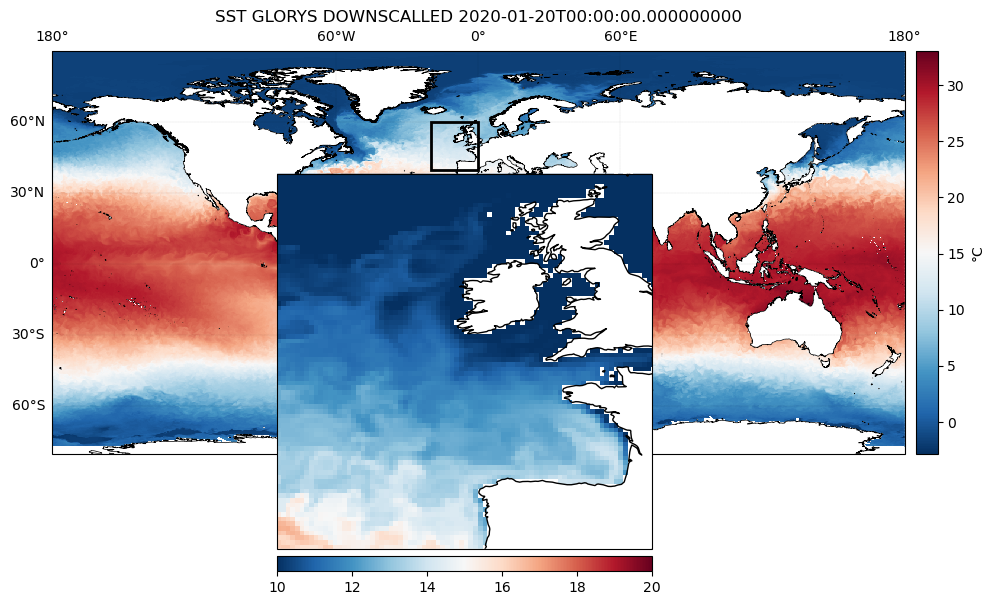

In [19]:
fig, axs = plt.subplots(nrows=1,ncols=1,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11*1,7.5*1))
#p0 = plt.pcolormesh(lon2D, lat2D, norm_uv, cmap='jet',vmax=1)
p0 = plt.pcolormesh(lon_down, lat_down, sst_down, cmap='RdBu_r')
plt.title("SST GLORYS DOWNSCALLED "+str(maps.time.values[0]))

axs.coastlines(resolution='10m', lw=0.5)
#axs.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#EEEEEE', edgecolor='face',alpha=1)

# optional add grid lines
p0.axes.gridlines(color='black', alpha=0., linestyle='--')

# draw parallels/meridiens and write labels
gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        linewidth=0.1, color='black', alpha=0.5, linestyle='--')
# adjust labels to taste
gl.top_labels = True
gl.right_labels = False
gl.bottom_labels = False
gl.left_labels = True
#gl.xlabels_bottom = False
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xlocator = mticker.FixedLocator([-180, -60, 0,  60, 180])
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

#get size and extent of axes:
axpos = axs.get_position()
pos_x = axpos.x0+axpos.width + 0.01# + 0.25*axpos.width
pos_y = axpos.y0
cax_width = 0.02
cax_height = axpos.height
#create new axes where the colorbar should go.
#it should be next to the original axes and have the same height!
pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])
cbar=plt.colorbar(p0, cax=pos_cax)
cbar.set_label('°C')

zoom_extent = [-20, 0, 40, 60]  # Exemple de zoom sur l'Europe

# Ajouter un zoom sur une région spécifique
ax_zoom = fig.add_axes([0.25, 0.10, 0.5, 0.5], projection=ccrs.PlateCarree())
ax_zoom.set_extent(zoom_extent, crs=ccrs.PlateCarree())  # Exemple de zoom sur l'Europe
ax_zoom.coastlines()
contour_zoom = ax_zoom.pcolormesh(lon_down, lat_down, sst_down, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmax=20,vmin=10)

#cax = fig.add_axes([ax_zoom.get_position().x1+0.01,ax_zoom.get_position().y0,0.02,ax_zoom.get_position().height])
cax = fig.add_axes([ax_zoom.get_position().x0,ax_zoom.get_position().y0-0.03,ax_zoom.get_position().width,0.02])
cbar = plt.colorbar(contour_zoom,cax=cax,orientation="horizontal")


# Ajouter les contours de la zone zoomée sur la carte principale
zoom_rect = plt.Rectangle((zoom_extent[0], zoom_extent[2]),
                          zoom_extent[1] - zoom_extent[0],
                          zoom_extent[3] - zoom_extent[2],
                          linewidth=2, edgecolor='k', facecolor='none',
                          transform=ccrs.PlateCarree())
axs.add_patch(zoom_rect)

In [20]:
sst_down_nonan = np.nan_to_num(sst_down)

In [21]:
from scipy.interpolate import interp2d

f = interp2d(lon_down[0,:], lat_down[:,0], sst_down_nonan, kind='linear')
sst_down_interp = f(lon_sat, lat_sat)
sst_down_interp = np.where(np.isnan(sst_sat),np.nan,sst_down_interp)

/tmp/ipykernel_308042/2165588148.py:3: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(lon_down[0,:], lat_down[:,0], sst_down_nonan, kind='linear')
/tmp/ipykernel_308042/2165588148.py:4: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

     

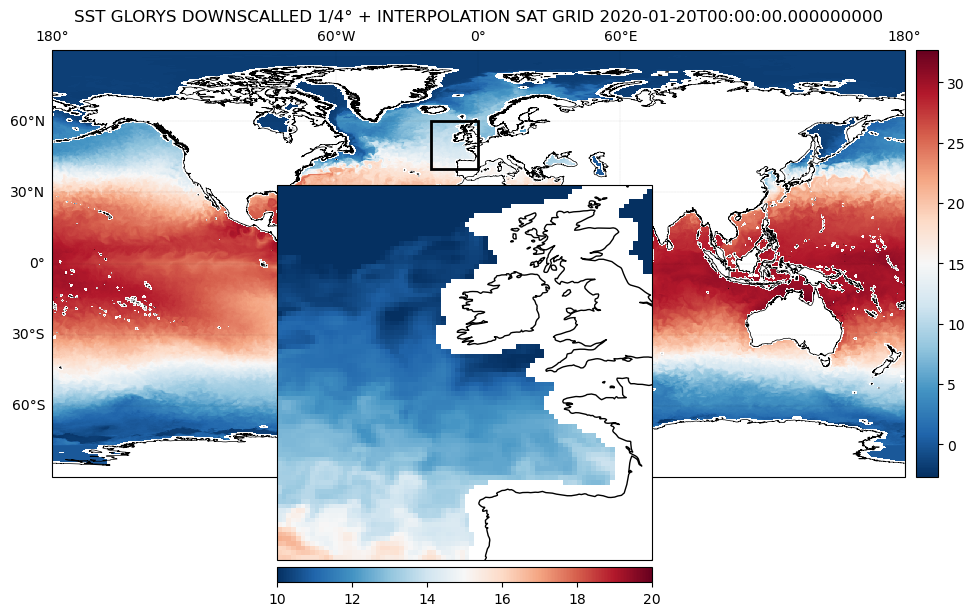

In [22]:
fig, axs = plt.subplots(nrows=1,ncols=1,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11*1,7.5*1))
#p0 = plt.pcolormesh(lon2D, lat2D, norm_uv, cmap='jet',vmax=1)
p0 = plt.pcolormesh(lon_sat, lat_sat ,sst_down_interp, cmap='RdBu_r')
plt.title("SST GLORYS DOWNSCALLED 1/4° + INTERPOLATION SAT GRID "+str(maps.time.values[0]))

axs.coastlines(resolution='10m', lw=0.5)
#axs.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#EEEEEE', edgecolor='face',alpha=1)

# optional add grid lines
p0.axes.gridlines(color='black', alpha=0., linestyle='--')

# draw parallels/meridiens and write labels
gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        linewidth=0.1, color='black', alpha=0.5, linestyle='--')
# adjust labels to taste
gl.top_labels = True
gl.right_labels = False
gl.bottom_labels = False
gl.left_labels = True
#gl.xlabels_bottom = False
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xlocator = mticker.FixedLocator([-180, -60, 0,  60, 180])
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

#get size and extent of axes:
axpos = axs.get_position()
pos_x = axpos.x0+axpos.width + 0.01# + 0.25*axpos.width
pos_y = axpos.y0
cax_width = 0.02
cax_height = axpos.height
#create new axes where the colorbar should go.
#it should be next to the original axes and have the same height!
pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])
plt.colorbar(p0, cax=pos_cax)

zoom_extent = [-20, 0, 40, 60]  # Exemple de zoom sur l'Europe

# Ajouter un zoom sur une région spécifique
ax_zoom = fig.add_axes([0.25, 0.10, 0.5, 0.5], projection=ccrs.PlateCarree())
ax_zoom.set_extent(zoom_extent, crs=ccrs.PlateCarree())  # Exemple de zoom sur l'Europe
ax_zoom.coastlines()
contour_zoom = ax_zoom.pcolormesh(lon_sat, lat_sat, sst_down_interp, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmax=20,vmin=10)

#cax = fig.add_axes([ax_zoom.get_position().x1+0.01,ax_zoom.get_position().y0,0.02,ax_zoom.get_position().height])
cax = fig.add_axes([ax_zoom.get_position().x0,ax_zoom.get_position().y0-0.03,ax_zoom.get_position().width,0.02])
cbar = plt.colorbar(contour_zoom,cax=cax,orientation="horizontal")


# Ajouter les contours de la zone zoomée sur la carte principale
zoom_rect = plt.Rectangle((zoom_extent[0], zoom_extent[2]),
                          zoom_extent[1] - zoom_extent[0],
                          zoom_extent[3] - zoom_extent[2],
                          linewidth=2, edgecolor='k', facecolor='none',
                          transform=ccrs.PlateCarree())
axs.add_patch(zoom_rect)